In [1]:
import pandas as pd

In [2]:
from quoptuna import DataPreparation, Optimizer

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
db_name = "Banknote"
study_name = "Banknote"
optimizer = Optimizer(db_name=db_name, study_name=study_name)

In [4]:
optimizer.storage_location

'sqlite:///db/Banknote.db'

In [5]:
optimizer.load_study()
study = optimizer.study

In [6]:
best_trial = study.best_trials

In [7]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score = (
        quantum_f1_score
        if quantum_f1_score != 0
        else classical_f1_score
        if classical_f1_score != 0
        else "N/A"
    )
    return f"Trial {trial.number} - F1 Score: {f1_score} {trial.params.get('model_type')}"

In [8]:
for trial in best_trial:
    print(format_trial(trial))

Trial 0 - F1 Score: 1.0 QuantumKitchenSinks
Trial 10 - F1 Score: 1.0 QuantumKitchenSinks
Trial 11 - F1 Score: 1.0 QuantumKitchenSinks
Trial 12 - F1 Score: 1.0 QuantumKitchenSinks
Trial 21 - F1 Score: 1.0 QuantumKitchenSinks
Trial 22 - F1 Score: 1.0 QuantumKitchenSinks
Trial 23 - F1 Score: 1.0 QuantumKitchenSinks
Trial 24 - F1 Score: 1.0 QuantumKitchenSinks
Trial 25 - F1 Score: 1.0 QuantumKitchenSinks
Trial 27 - F1 Score: 1.0 SVC
Trial 31 - F1 Score: 1.0 QuantumKitchenSinks
Trial 32 - F1 Score: 1.0 QuantumKitchenSinks
Trial 34 - F1 Score: 1.0 QuantumKitchenSinks
Trial 38 - F1 Score: 1.0 ProjectedQuantumKernel
Trial 41 - F1 Score: 1.0 QuantumKitchenSinks
Trial 42 - F1 Score: 1.0 QuantumKitchenSinks
Trial 46 - F1 Score: 1.0 QuantumKitchenSinks
Trial 51 - F1 Score: 1.0 QuantumKitchenSinks
Trial 52 - F1 Score: 1.0 QuantumKitchenSinks
Trial 54 - F1 Score: 1.0 QuantumKitchenSinks
Trial 60 - F1 Score: 1.0 QuantumKitchenSinks
Trial 61 - F1 Score: 1.0 QuantumKitchenSinks
Trial 62 - F1 Score: 1.0

In [9]:
model_params = best_trial[0].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.01,
 'n_input_copies': 1,
 'n_layers': 1,
 'observable_type': 'single',
 'repeats': 10,
 'C': 1,
 'gamma_factor': 0.1,
 'trotter_steps': 3,
 't': 0.1,
 'n_qfeatures': 'half',
 'n_episodes': 2000,
 'visible_qubits': 'full',
 'temperature': 1,
 'encoding_layers': 5,
 'degree': 2,
 'n_qchannels': 5,
 'qkernel_shape': 2,
 'kernel_shape': 5,
 'filter_name': 'edge_detect',
 'gamma': 0.001,
 'alpha': 0.001,
 'hidden_layer_sizes': '(50, 10, 5)',
 'eta0': 0.1,
 'model_type': 'QuantumKitchenSinks'}

In [10]:
file_path = "data/Banknote.csv"
data = pd.read_csv(file_path)
data

,variance,skewness,curtosis,entropy,target
0,3.62160,8.66610,-2.8073,-0.44699,-1
1,4.54590,8.16740,-2.4586,-1.46210,-1
2,3.86600,-2.63830,1.9242,0.10645,-1
3,3.45660,9.52280,-4.0112,-3.59440,-1
4,0.32924,-4.45520,4.5718,-0.98880,-1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [11]:
dp = DataPreparation(
    file_path=file_path, x_cols=list(data.columns.difference(["target"])), y_col="target"
)
data_dict = dp.get_data()

In [12]:
data_dict.keys()

dict_keys(['x_train', 'x_test', 'y_train', 'y_test'])

In [13]:
from quoptuna.backend.models import create_model

model = create_model(**model_params)

In [14]:
model.fit(data_dict["x_train"].values, data_dict["y_train"].values)

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\pennylane\devices\default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\pennylane\devices\default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

QuantumKitchenSinks(max_vmap=1, n_episodes=2000, n_qfeatures='half')

In [15]:
from quoptuna import XAI
from quoptuna.backend.xai.xai import XAIConfig

config = XAIConfig(use_proba=True, onsubset=True, subset_size=50)
xai = XAI(model=model, data=data_dict, config=config)
xai.get_report()

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


{'confusion_matrix': array([[152,   0],
        [  0, 191]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n          -1       1.00      1.00      1.00       152\n           1       1.00      1.00      1.00       191\n\n    accuracy                           1.00       343\n   macro avg       1.00      1.00      1.00       343\nweighted avg       1.00      1.00      1.00       343\n',
 'roc_curve': 'y should be a 1d array, got an array of shape (343, 2) instead.'}

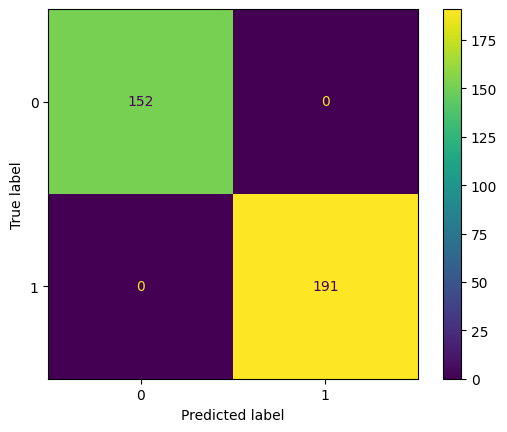

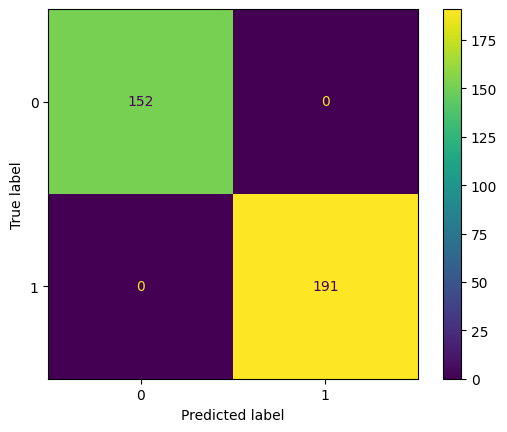

In [16]:
xai.plot_confusion_matrix()

In [17]:
xai.explainer.feature_names

['curtosis', 'entropy', 'skewness', 'variance']

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
ExactExplainer explainer:   2%|▏         | 1/50 [00:00<?, ?it/s]c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
ExactExplainer explainer:   6%|▌         | 3/50 [06:25<1:24:45, 108.19s/it]c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature 

''
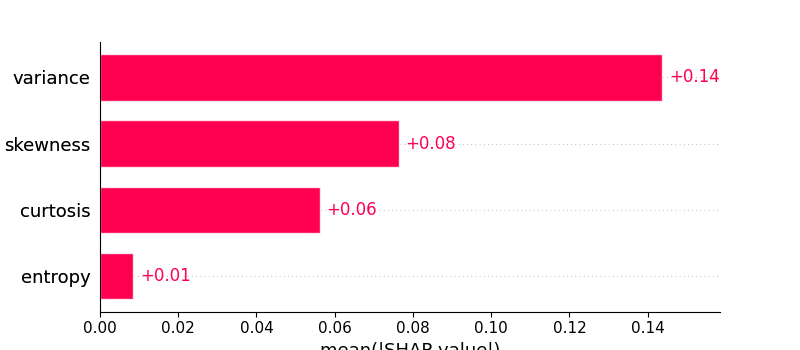

In [18]:
xai.get_plot("bar", max_display=5, class_index=1)

In [20]:
import os

In [21]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
xai.get_plot("bar", max_display=5)

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

In [23]:
report = xai.generate_report_with_langchain(
    provider="google", api_key=os.getenv("GOOGLE_GEMINI_API_KEY"), model_name="gemini-1.5-flash"
)

ValueError: Error generating plots: list index out of range

<Figure size 640x480 with 0 Axes>

In [33]:
import base64
import io

import matplotlib.pyplot as plt

from quoptuna.backend.xai.xai import PlotType


def generate_report_images(num_waterfall_plots: int):
    images: dict[str, str] = {}  # Change type hint to allow string keys
    plot_types: list[PlotType] = ["bar", "beeswarm", "violin", "heatmap"]

    try:
        for plot_type in plot_types:
            images[plot_type] = xai.get_plot(plot_type, class_index=1)

        # if xai.onsubset:
        #     num_waterfall_plots = min(num_waterfall_plots, xai.subset_size)
        # else:
        #     num_waterfall_plots = min(num_waterfall_plots, len(xai.x_test))

        # indices = sorted(random.sample(range(num_waterfall_plots), num_waterfall_plots))
        # for i in indices:
        #     waterfall_plot_type: PlotType = "waterfall"
        #     images[f"{waterfall_plot_type}_{i}"] = xai.get_plot(waterfall_plot_type, index=i)

        fig = xai.plot_confusion_matrix()
        img_buf = io.BytesIO()
        fig.savefig(img_buf, format="png")
        img_buf.seek(0)
        img_base64 = base64.b64encode(img_buf.getvalue()).decode("utf-8")
        images["confusion_matrix"] = f"data:image/png;base64,{img_base64}"
        plt.close(fig)

    except Exception as e:
        msg = f"Error generating plots: {e}"
        raise ValueError(msg) from e

    return images

In [34]:
images = generate_report_images(5)

In [46]:
chat = xai._initialize_chat(
    api_key=os.getenv("GOOGLE_GEMINI_API_KEY"),
    model_name="models/gemini-2.5-pro",
    provider="google",
)

report = xai.get_report()
images = generate_report_images(5)
with open(
    r"C:\Users\aneen\Documents\GitHub\quoptuna\src\quoptuna\backend\xai\prompt.txt",
    encoding="utf-8",
) as f:
    prompt2 = f.read()
report = xai._generate_final_report(chat, report, images, prompt2)

In [47]:
print(report)

### **AI Model Governance and Evaluation Report**

**Date:** October 26, 2023
**Model ID:** Banknote Authentication Classifier
**Version:** 1.0
**Report Author:** AI Governance Assistant

---

### **Executive Summary**

This report provides a comprehensive governance-oriented analysis of the Banknote Authentication Classifier model. The evaluation reveals a model with perfect predictive performance on the test dataset, achieving 100% accuracy, precision, recall, and F1-score. While seemingly ideal, this result raises significant concerns about potential **overfitting** or **data leakage**, which could lead to poor generalization on new, unseen data.

The SHAP (SHapley Additive exPlanations) analysis indicates that the model's predictions are primarily driven by the `variance` and `skewness` features. This high dependency on a small subset of features, combined with perfect metrics, necessitates a thorough review and further validation before the model can be considered for deployment. 

In [45]:
print(report)

## AI Model Evaluation and Governance Report

**Model Name:** [Model Name Placeholder]
**Date of Evaluation:** October 26, 2023
**Objective:** To assess the performance, interpretability, and potential governance risks of the classification model based on validation dataset metrics and SHAP analysis.

---

## 1. Evaluation Metrics Analysis

The model demonstrates exceptional performance on the evaluated dataset, achieving perfect classification across all standard metrics.

### 1.1 Confusion Matrix Interpretation

The confusion matrix provides the following counts for the binary classification task (Class 0 and Class 1):

| True Label | Predicted Label 0 | Predicted Label 1 |
| :---: | :---: | :---: |
| **0** | True Negatives (TN): **152** | False Positives (FP): **0** |
| **1** | False Negatives (FN): **0** | True Positives (TP): **191** |
| **Total Instances:** | 343 | |

### 1.2 Performance Metric Calculation

Based on the confusion matrix, the following performance metrics are deri